In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [28]:
# GitHub에서 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [31]:
# 데이터와 타겟 분리
X = df.drop('BMI', axis=1).values
y = df['BMI'].values

In [32]:

Y = pd.get_dummies(y).values

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614, 248), (154, 248))

In [35]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
model.add(Dense(10, input_shape=(7,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))  
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                80        
                                                                 
 dense_17 (Dense)            (None, 30)                330       
                                                                 
 dense_18 (Dense)            (None, 30)                930       
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1371 (5.36 KB)
Trainable params: 1371 (5.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 2s 26ms/step - loss: 1176.8877 - mse: 1176.8877 - val_loss: 72.7086 - val_mse: 72.7086
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 34.4328 - mse: 34.4328 - val_loss: 6.8440 - val_mse: 6.8440
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 4.5935 - mse: 4.5935 - val_loss: 3.5511 - val_mse: 3.5511
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 2.3776 - mse: 2.3776 - val_loss: 3.4082 - val_mse: 3.4082
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 3.1306 - mse: 3.1306 - val_loss: 1.5997 - val_mse: 1.5997
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 2.9408 - mse: 2.9408 - val_loss: 0.9230 - val_mse: 0.9230
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 1.9343 - mse: 1.9343 - val_loss: 0.6184 - val_mse: 0.6184
Epoch 8/10
20/20 [==============================] - 0s 8ms/step - loss: 2.3395 

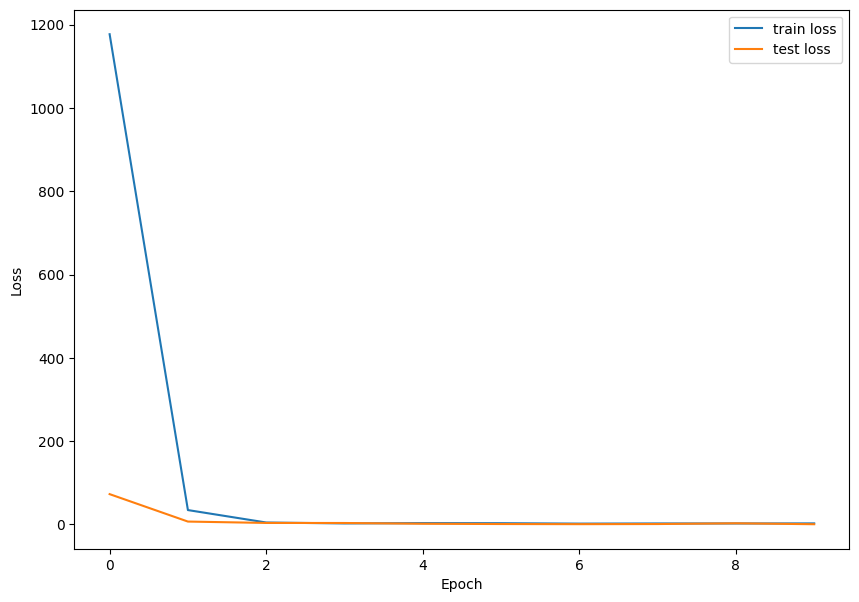

In [38]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.4698 - mse: 0.4698


[0.46981024742126465, 0.46981024742126465]